In [1]:
!pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.5 MB/s eta 0:00:00


In [2]:
import anvil.server

In [3]:
anvil.server.connect("server_HY5LXYU4CT55Q7RWFCGTODZV-PW3FAWZMWJJWCTDA")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "klasifikasi burung" as SERVER


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


Label kelas: ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL']
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1513 - loss: 2.5823Testing - Epoch 1: Accuracy = 0.3250, Loss = 4.8917
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.1528 - loss: 2.5782 - val_accuracy: 0.0042 - val_loss: 12.2607
Epoch 2/30
67/71 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4863 - loss: 1.5093Testing - Epoch 2: Accuracy = 0.4500, Loss = 4.6887
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4892 - loss: 1.5030 - val_accuracy: 0.0042 - val_loss: 12.8815
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 

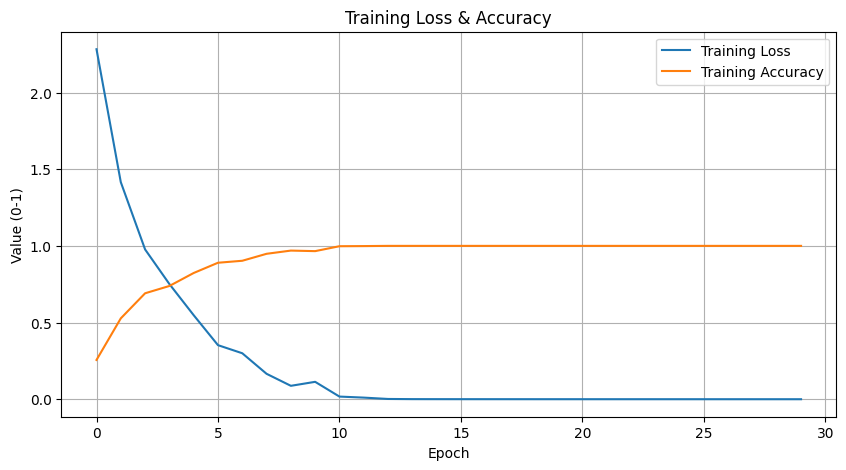

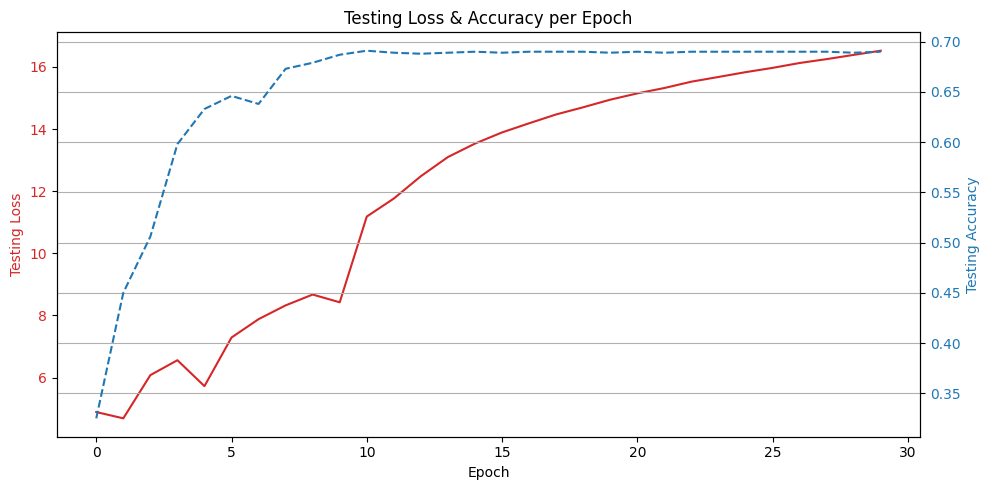

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


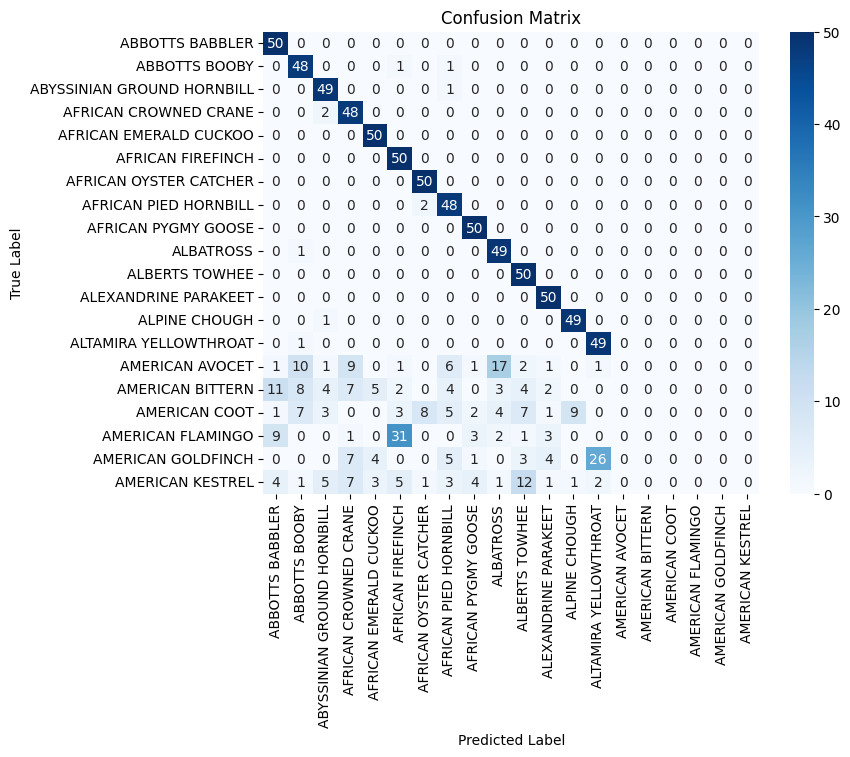

=== Classification Report ===
                            precision    recall  f1-score   support

           ABBOTTS BABBLER       0.66      1.00      0.79        50
             ABBOTTS BOOBY       0.63      0.96      0.76        50
ABYSSINIAN GROUND HORNBILL       0.75      0.98      0.85        50
     AFRICAN CROWNED CRANE       0.61      0.96      0.74        50
    AFRICAN EMERALD CUCKOO       0.81      1.00      0.89        50
         AFRICAN FIREFINCH       0.54      1.00      0.70        50
    AFRICAN OYSTER CATCHER       0.82      1.00      0.90        50
     AFRICAN PIED HORNBILL       0.66      0.96      0.78        50
       AFRICAN PYGMY GOOSE       0.82      1.00      0.90        50
                 ALBATROSS       0.64      0.98      0.78        50
            ALBERTS TOWHEE       0.63      1.00      0.78        50
      ALEXANDRINE PARAKEET       0.81      1.00      0.89        50
             ALPINE CHOUGH       0.83      0.98      0.90        50
     ALTAMIRA YEL

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Import Library
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import Callback
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Path Dataset
extract_path = "/content/Dataset/Burung"
path_train = os.path.join(extract_path, "train")
path_test = os.path.join(extract_path, "test")

# Ambil nama label dari folder
LabelKelas = sorted([d for d in os.listdir(path_train) if os.path.isdir(os.path.join(path_train, d))])
print("Label kelas:", LabelKelas)

# Fungsi untuk load gambar dan label
def LoadCitraTraining(sDir, LabelKelas):
    JumlahKelas = len(LabelKelas)
    TargetKelas = np.eye(JumlahKelas)
    X, T = [], []

    for i, label in enumerate(LabelKelas):
        DirKelas = os.path.join(sDir, label)
        files = os.listdir(DirKelas)

        for f in files:
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(DirKelas, f)
                img = cv2.imread(path)
                if img is None:
                    continue
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
                img = img.astype('float32')
                X.append(img)
                T.append(TargetKelas[i])

    return np.array(X).astype('float32'), np.array(T).astype('float32')

# Arsitektur model CNN
def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    output = Dense(JumlahKelas, activation='softmax')(x)

    model = Model(input_img, output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Callback khusus untuk evaluasi testing per epoch
class TestAccuracyCallback(Callback):
    def __init__(self, X_test, T_test):
        self.X_test = X_test
        self.T_test = T_test
        self.test_accuracies = []
        self.test_losses = []

    def on_epoch_end(self, epoch, logs=None):
        loss, acc = self.model.evaluate(self.X_test, self.T_test, verbose=0)
        self.test_accuracies.append(acc)
        self.test_losses.append(loss)
        print(f"Testing - Epoch {epoch+1}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")

# Fungsi training CNN
def TrainingCNN(JumlahEpoh, DirektoriDataSet, LabelKelas, X_test, T_test, NamaFileModel='model_burung.h5'):
    X_train, Y_train = LoadCitraTraining(DirektoriDataSet, LabelKelas)
    model = ModelDeepLearningCNN(len(LabelKelas))
    test_callback = TestAccuracyCallback(X_test, T_test)

    history = model.fit(
        X_train, Y_train,
        epochs=JumlahEpoh,
        shuffle=True,
        validation_split=0.3,
        callbacks=[test_callback]
    )

    model.save(NamaFileModel)
    return model, history, test_callback.test_accuracies, test_callback.test_losses

# Set parameter training
JumlahEpoch = 30
FileModel = "model_burung.h5"

# Load data testing terlebih dahulu
X_test, T_test = LoadCitraTraining(path_test, LabelKelas)

# Mulai training
ModelCNN, history, test_acc, test_loss = TrainingCNN(JumlahEpoch, path_train, LabelKelas, X_test, T_test, FileModel)

# === GRAFIK 1: Training Loss & Accuracy ===
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss & Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value (0-1)')
plt.legend()
plt.grid(True)
plt.show()

# === GRAFIK 2: Testing Loss & Accuracy dalam 1 Grafik (tanpa persen) ===
fig, ax1 = plt.subplots(figsize=(10, 5))

# Sumbu kiri: loss
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Testing Loss', color=color)
ax1.plot(test_loss, color=color, label='Testing Loss')
ax1.tick_params(axis='y', labelcolor=color)

# Sumbu kanan: accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Testing Accuracy', color=color)
ax2.plot(test_acc, color=color, linestyle='--', label='Testing Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Testing Loss & Accuracy per Epoch')
fig.tight_layout()
plt.grid(True)
plt.show()
# === EVALUASI DENGAN CONFUSION MATRIX DAN CLASSIFICATION REPORT ===

# Prediksi data testing
Y_pred_prob = ModelCNN.predict(X_test)
Y_pred = np.argmax(Y_pred_prob, axis=1)
Y_true = np.argmax(T_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=LabelKelas, yticklabels=LabelKelas)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("=== Classification Report ===")
print(classification_report(Y_true, Y_pred, target_names=LabelKelas))

In [9]:
# integrasi antara model CNN dengan antarmuka web Anvil
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

anvil.server.connect("server_HY5LXYU4CT55Q7RWFCGTODZV-PW3FAWZMWJJWCTDA")

model = load_model("model_burung.h5")

def klasifikasi_gambar(image_path, model, LabelKelas):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)

    max_prob = pred.max()
    if max_prob > 0.5:
        idx = np.argmax(pred)
        return f"{LabelKelas[idx]}"
    return "Tidak diketahui"

@anvil.server.callable
def predict_from_upload(file):
    # Simpan file ke disk
    with open("temp.jpg", "wb") as f:
        f.write(file.get_bytes())

    # Baca gambar, proses, prediksi
    img = cv2.imread("temp.jpg")
    img = cv2.resize(img, (128, 128))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    # Prediksi dengan model
    pred = ModelCNN.predict(img)

    max_prob = pred.max()
    if max_prob > 0.5:
        idx = np.argmax(pred)
        return f"{LabelKelas[idx]}"
    else:
        return "Tidak dikenali"

try:
    anvil.server.wait_forever()
except KeyboardInterrupt:
    print("Program dihentikan.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
Program dihentikan.
